In [ ]:
import h5py
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
import glob
import os
import re
from scipy import stats

In [ ]:
#import matplotlib
#%matplotlib
matplotlib.use('Qt5Agg')


In [ ]:
#sampling rate according to the paper
rate = 2000
dt = 1/rate


# Extract the signals from files and make them one Dataframe

In [ ]:
#This is for checking the trend of the graph
#LOAD THE SPECIFIC FILE
path = r'C:\Users\AHUSSAIN14\OneDrive - National University of Sciences & Technology\ML in CNC milling\CNC_Machining-main\CNC_Machining-main\data\M02\OP07\bad' # use your path
filename = path + ("\\M02_Feb_2019_OP07_001.h5")
#read HDF5 file 
f = h5py.File(filename,'r')
key = list(f.keys())
plt.close('all')
condition1 = 'good'
#get the filename to out it as a feature in data
path1, filename1 = os.path.split(filename)
root, ext = os.path.splitext(filename1)
a= root.rsplit("_")
df = pd.DataFrame(np.array(f[key[0]]))
#creating time vector
time_vector = [i for i in range (df.shape[0])]
time_vector = [element * dt for element in time_vector]
df.insert(3, 'time', time_vector)

df.columns = ['X','Y','Z','Time (s)']
t = df['Time (s)']
x = df['X']
y=  df['Y']
z = df['Z']
#plot the figure and slice the required data
#plt.ion()
fig = plt.figure(figsize=(8, 6))
plt.plot(t,x, '-r')
plt.show
#plt.clf()
# ax = fig.add_subplot(211, facecolor='#FFFFCC')
# ax.plot(t,x, '-r')
# ax.plot(t,y ,'-b')
# ax.plot(t,z ,'-g')
# ax.set_ylim(-2, 2)
# ax.set_title('Press left mouse button and drag to test')

# ax2 = fig.add_subplot(212, facecolor='#FFFFCC')
# line2, = ax2.plot(t,x, '-r')
# line3, = ax2.plot(t,y ,'-b')
# line4, = ax2.plot(t,z ,'-g')

# coords = {}

# def onselect(tmin, tmax):
#     indmin, indmax = np.searchsorted(t, (tmin, tmax))
#     indmax = min(len(t) - 1, indmax)

#     thist = t[indmin:indmax]
#     thisx = x[indmin:indmax]
#     thisy = y[indmin:indmax]
#     thisz = z[indmin:indmax]
#     coords['t'] = thist
#     coords['x'] = thisx
#     coords['y'] = thisy
#     coords['z'] = thisz
#     line2.set_data(thist, thisx)
#     line3.set_data(thist, thisy)
#     line4.set_data(thist, thisz)
#     ax2.set_xlim(thisx[0], thisx[-1])
#     #ax2.set_ylim(thisy.min(), thisy.max())
#     fig.canvas.draw()
    

# # set useblit True on gtkagg for enhanced performance
# span = SpanSelector(ax, onselect, 'horizontal', useblit=True, span_stays = True, 
#                     button = 1,rectprops=dict(alpha=0.5, facecolor='red'))

<function matplotlib.pyplot.show(*, block=None)>

In [ ]:
# slicedata = pd.DataFrame()
# slicedata = pd.concat([coords['t'],coords['x'],coords['y'],coords['z']],axis=1, join="inner")
# slicedata['Machine'] = a[0]
# slicedata['Date'] = a[1]+a[2]
# slicedata['Tool'] = a[3]
# slicedata['Condition'] = condition1
# slicedata['Repeat'] = a[4]
# slicedata = slicedata[['Machine', 'Date', 'Tool', 'Condition', 'Repeat','Time (s)','X','Y','Z']]

In [ ]:
# slicedata.head()

In [ ]:
# masterdataframe = masterdataframe.append(slicedata)
# masterdataframe = masterdataframe.reset_index(drop=True)

In [ ]:
masterdataframe= pd.DataFrame()
masterdataframe.shape

(0, 0)

In [ ]:
# #USE TO MERGE ALL FILES TOGETHER      
root_dir = r'C:\Users\AHUSSAIN14\OneDrive - National University of Sciences & Technology\ML in CNC milling\CNC_Machining-main\CNC_Machining-main\data'
dirs_positive_list = ['OP01','OP02','OP04','OP06','OP07','OP08','OP10','OP11','OP12','OP14']
condition = ['bad']
num = '005'
r1 = 2.6 ; r2 = 21.7
for folder, subfolders, files in os.walk(root_dir):
    if folder != root_dir:
            root, ext = os.path.splitext(folder)
            v= root.rsplit("\\")
            check1 = any(item in dirs_positive_list  for item in v)
            check2 = any(item in condition for item in v)
            if check1 & check2:
                    for f in files:
                        root, ext = os.path.splitext(f)
                        aa= root.rsplit("_")
                        if aa[-1] <= num:
                            fff = os.path.join(folder,f)
                            f1 = h5py.File(fff,'r')
                            key = list(f1.keys())
                            df = pd.DataFrame(np.array(f1[key[0]]))
                            time_vector = [i for i in range (df.shape[0])]
                            time_vector = [element * dt for element in time_vector]
                            df.insert(3, 'time', time_vector)
                            df.columns = ['X','Y','Z','Time (s)']
                            newdata = pd.DataFrame()
#                             T1 = df[(df['Time (s)'] >r1) & (df['Time (s)'] <r2)]['Time (s)']
#                             X1 = df[(df['Time (s)'] >r1) & (df['Time (s)'] <r2)]['X']
#                             Y1 = df[(df['Time (s)'] >r1) & (df['Time (s)'] <r2)]['Y']
#                             Z1 = df[(df['Time (s)'] >r1) & (df['Time (s)'] <r2)]['Z']
                            T1 = df['Time (s)']
                            X1 = df['X']
                            Y1 = df['Y']
                            Z1 = df['Z']
                            newdata = pd.concat([T1,X1,Y1,Z1],axis=1, join="inner")
                            newdata['Machine'] = aa[0]
                            newdata['Date'] = aa[1]+aa[2]
                            newdata['Tool'] = aa[3]
                            newdata['Condition'] = condition[0]
                            newdata['Repeat'] = aa[4]

                            newdata = newdata[['Machine', 'Date', 'Tool', 'Condition', 'Repeat','Time (s)','X','Y','Z']]

                            masterdataframe = masterdataframe.append(newdata)
                            masterdataframe = masterdataframe.reset_index(drop=True)
                                           
                
                

In [ ]:
#df2 = df2[(df2['Tool']== 'OP04') | (df2['Tool']== 'OP05') | (df2['Tool']== 'OP06') ]

In [ ]:
#datap.rename(columns = {'X':'OP12'}, inplace = True)

In [ ]:
#df3.rename(columns = {'X':'M01X','Y':'M01Y','Z':'M01Z'}, inplace = True)

In [ ]:
#masterdataframe.to_csv('goodbaddata.csv', sep='\t') # relative position

OSError: [Errno 28] No space left on device

In [ ]:
#read csv to append the data and reset index
masterdata = pd.read_csv('goodbaddatabalanced.csv',sep='\t')
masterdata = masterdata.drop(['Unnamed: 0'], axis = 1)

In [ ]:
#Training
# df =  masterdata[(masterdata['Machine'] == 'M02') | (masterdata['Machine'] == 'M03')]

#TEST
# df =  masterdata[(masterdata['Machine'] == 'M01')]

df =  masterdata

df['Repeat'] = df['Repeat'].astype(str)
df['newcol'] = df['Machine'] +  df['Date'] + df['Tool'] + df['Condition'] + df['Repeat']
df = df.reset_index(drop = True)

In [ ]:
# df2 = masterdata[((masterdata['Tool'] == 'OP01') | (masterdata['Tool'] == 'OP02') | (masterdata['Tool'] == 'OP04') | (masterdata['Tool'] == 'OP07') | (masterdata['Tool'] == 'OP10') ) ]
# df3 = df2[df2['Repeat'] <= 2]
# df4 = df3[~((df3['Condition'] == 'good') & (df3['Time (s)'] >= 12.5)) ]
# df5 = df4[~((df4['Condition'] == 'good') & (df4['Tool'] == 'OP01') &(df4['Time (s)'] >= 6)) ]
# df6 = df5[~((df5['Condition'] == 'good') & (df5['Tool'] == 'OP02') &(df5['Time (s)'] >= 5.7)) ]
# df7 = df6[~((df6['Condition'] == 'good') & (df6['Tool'] == 'OP07') &(df6['Time (s)'] >= 6.5)) ]
# df8 = df7[~((df7['Condition'] == 'good') & (df7['Tool'] == 'OP10') &(df7['Time (s)'] >= 9.9)) ]
# df8.to_csv('goodbaddatabalanced.csv', sep='\t') # relative position

In [ ]:
# df2['Tool'].unique()

array(['OP01', 'OP02', 'OP04', 'OP07', 'OP10'], dtype=object)

In [ ]:
# masterdata = masterdata.append(masterdataframe)
# masterdata = masterdata.reset_index(drop = True)

# Exploratory Data Analysis

In [ ]:
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Tool', hue = 'Machine', data = masterdata[(masterdata['Condition'] == 'bad')])
plt.title('Number of samples')
plt.show()
plt.clf()

KeyboardInterrupt: 

In [ ]:
plt.clf()

In [ ]:
sns.FacetGrid(masterdata, hue = 'Tool', height = 6).map(sns.distplot, 'X').add_legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
sns.FacetGrid(masterdata, hue = 'Tool', size = 6).map(sns.distplot, 'Y').add_legend()

In [ ]:
sns.FacetGrid(masterdata, hue = 'Tool', size = 6).map(sns.distplot, 'Z').add_legend()

# Data Transformation

## Feature Extraction in  time domain using windowing

In [ ]:
from scipy.stats import entropy
from math import log, e
import pandas as pd


def entropy2(labels, base=None):
  """ Computes entropy of label distribution. """

  n_labels = len(labels)

  if n_labels <= 1:
    return 0

  value,counts = np.unique(labels, return_counts=True)
  probs = counts / n_labels
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent

In [ ]:
# #This is done to avoid for loop
# df2['toolcondition'] = df2['Machine'] +  df2['Tool'] 
# a = df2['toolcondition'].unique()
# a

C:\Users\AHUSSAIN14\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['M01OP02', 'M01OP06', 'M01OP12', 'M02OP02', 'M02OP06', 'M02OP12',
       'M03OP02', 'M03OP06', 'M03OP12'], dtype=object)

In [ ]:
sum1=[]
window_size = 2000
step_size = 1000
for i in df['newcol'].unique():
    master_data =df[(df['newcol'] == i)]
    v = 0
    for j in range(0, master_data.shape[0] - window_size, step_size):
        v = v+1
    print(v)
        #num_segments = np.floor(len(master_data )/1000)
    sum1.append(v)
    #print(num_segments)
print(np.sum(sum1))

37
46
70
66
123
31
40
44
36
78
82
84
85
42
45
45
71
74
118
123
124
33
36
36
84
84
33
42
70
113
118
28
38
34
88
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
18
18
18
18
18
18
18
18
18
18
18
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
13
13
13
13
13
13
13
13
13
13
13
13
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
18
18
18
18
18
18
18
18
18
18
18
18
18
18
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
13
13
13
13
13
13
13
13
13
13
13
13
13
13
4307


In [ ]:
df.head()

,Machine,Date,Tool,Condition,Repeat,Time (s),X,Y,Z,newcol
0,M01,Aug2019,OP01,bad,0,0.0000,-265.0,-230.0,-1056.0,M01Aug2019OP01bad0
1,M01,Aug2019,OP01,bad,0,0.0005,-42.0,-320.0,-870.0,M01Aug2019OP01bad0
2,M01,Aug2019,OP01,bad,0,0.0010,-58.0,-76.0,-802.0,M01Aug2019OP01bad0
3,M01,Aug2019,OP01,bad,0,0.0015,-197.0,103.0,-774.0,M01Aug2019OP01bad0
4,M01,Aug2019,OP01,bad,0,0.0020,-134.0,396.0,-1083.0,M01Aug2019OP01bad0


In [ ]:
#This will create the data list according to toolcondition
x_i = []
y_i = []
z_i = []
labels_i = []
data = df
window_size = 2000
step_size = 1000
# Statistical Features on raw x, y and z in time domain
time_feature_all = pd.DataFrame() 
# time_feature_test = pd.DataFrame()
for i in data['newcol'].unique():
    x_j = []
    y_j = []
    z_j = []
    labels_j = []
    dates_j = []
    machines_j = []
  
    master_data =data[(data['newcol'] == i)]
    print(i)
    print(master_data.shape[0])

    for j in range(0, master_data.shape[0] - window_size, step_size):
        xs = master_data['X'].values[j: j + window_size]
        ys = master_data['Y'].values[j: j + window_size]
        zs = master_data['Z'].values[j: j + window_size]
        dates = master_data['Date'].values[j: j + window_size]
        machines = master_data['Machine'].values[j: j + window_size]
        operation = master_data['Tool'].values[j: j + window_size]
        condition = master_data['Condition'].values[j: j + window_size]
        label = operation + condition
        
        
        x_j.append(xs)
        y_j.append(ys)
        z_j.append(zs)
        dates_j.append(dates)
        machines_j.append(machines)
        labels_j.append(label)
        
    time_feature = pd.DataFrame()
  
    #parameters
    time_feature['Machine'] = pd.Series(machines_j).apply(lambda x: x.max())
    time_feature['Date'] = pd.Series(dates_j).apply(lambda x: x.max())
    time_feature['Toolcondition'] = pd.Series(labels_j).apply(lambda x: x.max())
    
    # mean
    time_feature['x_mean'] = pd.Series(x_j).apply(lambda x: x.mean())
    time_feature['y_mean'] = pd.Series(y_j).apply(lambda x: x.mean())
    time_feature['z_mean'] = pd.Series(z_j).apply(lambda x: x.mean())
    
    # std dev
    time_feature['x_std'] = pd.Series(x_j).apply(lambda x: x.std())
    time_feature['y_std'] = pd.Series(y_j).apply(lambda x: x.std())
    time_feature['z_std'] = pd.Series(z_j).apply(lambda x: x.std())

#     # avg absolute diff
#     time_feature['x_aad'] = pd.Series(x_j).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
#     time_feature['y_aad'] = pd.Series(y_j).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
#     time_feature['z_aad'] = pd.Series(z_j).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

    # min
    time_feature['x_min'] = pd.Series(x_j).apply(lambda x: x.min())
    time_feature['y_min'] = pd.Series(y_j).apply(lambda x: x.min())
    time_feature['z_min'] = pd.Series(z_j).apply(lambda x: x.min())

    # max
    time_feature['x_max'] = pd.Series(x_j).apply(lambda x: x.max())
    time_feature['y_max'] = pd.Series(y_j).apply(lambda x: x.max())
    time_feature['z_max'] = pd.Series(z_j).apply(lambda x: x.max())
    
#     # max-min diff
#     time_feature['x_maxmin_diff'] = time_feature['x_max'] -time_feature['x_min']
#     time_feature['y_maxmin_diff'] = time_feature['y_max'] - time_feature['y_min']
#     time_feature['z_maxmin_diff'] = time_feature['z_max'] - time_feature['z_min']

#     # median
#     time_feature['x_median'] = pd.Series(x_j).apply(lambda x: np.median(x))
#     time_feature['y_median'] = pd.Series(y_j).apply(lambda x: np.median(x))
#     time_feature['z_median'] = pd.Series(z_j).apply(lambda x: np.median(x))

#     # median abs dev 
#     time_feature['x_mad'] = pd.Series(x_j).apply(lambda x: np.median(np.absolute(x - np.median(x))))
#     time_feature['y_mad'] = pd.Series(y_j).apply(lambda x: np.median(np.absolute(x - np.median(x))))
#     time_feature['z_mad'] = pd.Series(z_j).apply(lambda x: np.median(np.absolute(x - np.median(x))))

#     # interquartile range
#     time_feature['x_IQR'] = pd.Series(x_j).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
#     time_feature['y_IQR'] = pd.Series(y_j).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
#     time_feature['z_IQR'] = pd.Series(z_j).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

#     # negtive count
#     time_feature['x_neg_count'] = pd.Series(x_j).apply(lambda x: np.sum(x < 0))
#     time_feature['y_neg_count'] = pd.Series(y_j).apply(lambda x: np.sum(x < 0))
#     time_feature['z_neg_count'] = pd.Series(z_j).apply(lambda x: np.sum(x < 0))

#     # positive count
#     time_feature['x_pos_count'] = pd.Series(x_j).apply(lambda x: np.sum(x > 0))
#     time_feature['y_pos_count'] = pd.Series(y_j).apply(lambda x: np.sum(x > 0))
#     time_feature['z_pos_count'] = pd.Series(z_j).apply(lambda x: np.sum(x > 0))

#     # values above mean
#     time_feature['x_above_mean'] = pd.Series(x_j).apply(lambda x: np.sum(x > x.mean()))
#     time_feature['y_above_mean'] = pd.Series(y_j).apply(lambda x: np.sum(x > x.mean()))
#     time_feature['z_above_mean'] = pd.Series(z_j).apply(lambda x: np.sum(x > x.mean()))

#     # number of peaks
#     time_feature['x_peak_count'] = pd.Series(x_j).apply(lambda x: len(find_peaks(x)[0]))
#     time_feature['y_peak_count'] = pd.Series(y_j).apply(lambda x: len(find_peaks(x)[0]))
#     time_feature['z_peak_count'] = pd.Series(z_j).apply(lambda x: len(find_peaks(x)[0]))

    # skewness
    time_feature['x_skewness'] = pd.Series(x_j).apply(lambda x: stats.skew(x))
    time_feature['y_skewness'] = pd.Series(y_j).apply(lambda x: stats.skew(x))
    time_feature['z_skewness'] = pd.Series(z_j).apply(lambda x: stats.skew(x))

    # kurtosis
    time_feature['x_kurtosis'] = pd.Series(x_j).apply(lambda x: stats.kurtosis(x))
    time_feature['y_kurtosis'] = pd.Series(y_j).apply(lambda x: stats.kurtosis(x))
    time_feature['z_kurtosis'] = pd.Series(z_j).apply(lambda x: stats.kurtosis(x))

    # energy
    time_feature['x_energy'] = pd.Series(x_j).apply(lambda x: np.sum(x**2)/len(x))
    time_feature['y_energy'] = pd.Series(y_j).apply(lambda x: np.sum(x**2)/len(x))
    time_feature['z_energy'] = pd.Series(z_j).apply(lambda x: np.sum(x**2/len(x)))

    # entropy
    time_feature['x_entropy']  = pd.Series(x_j).apply(lambda x: entropy2(x,2))
    time_feature['y_entropy']  = pd.Series(y_j).apply(lambda x: entropy2(x,2))
    time_feature['z_entropy']  = pd.Series(z_j).apply(lambda x: entropy2(x,2))
    
    
    # avg resultant
    #time_feature['avg_result_accl'] = [v.mean() for v in ((pd.Series(x_j)**2 + pd.Series(y_j)**2 + pd.Series(z_j)**2)**0.5)]

    #signal magnitude area
#     time_feature['sma'] =    pd.Series(x_j).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_j).apply(lambda x: np.sum(abs(x)/100)) \
#                   + pd.Series(z_j).apply(lambda x: np.sum(abs(x)/100))
    
    
    time_feature_all = time_feature_all.append(time_feature)
    time_feature_all = time_feature_all.reset_index(drop = True)
#     time_feature_test = time_feature_test.append(time_feature)
#     time_feature_test = time_feature_test.reset_index(drop = True)









M01Aug2019OP01bad0
38983
M01Feb2019OP01bad0
47081
M01Feb2019OP02bad0
71711
M01Aug2019OP04bad0
67730
M01Feb2019OP04bad0
124781
M01Aug2019OP07bad0
32199
M01Aug2021OP07bad0
42000
M01Aug2021OP07bad1
46000
M01Feb2019OP07bad0
37511
M01Aug2021OP10bad0
80000
M01Feb2019OP10bad0
83441
M01Feb2019OP10bad1
85831
M01Feb2019OP10bad2
86021
M02Aug2019OP01bad0
43361
M02Feb2019OP01bad0
46811
M02Feb2019OP01bad1
46511
M02Feb2019OP02bad0
72381
M02Feb2019OP02bad1
75741
M02Aug2019OP04bad0
119190
M02Feb2019OP04bad0
124731
M02Feb2019OP04bad2
125751
M02Aug2019OP07bad0
34447
M02Feb2019OP07bad0
37531
M02Feb2019OP07bad1
37671
M02Feb2019OP10bad0
85591
M02Feb2019OP10bad1
85641
M03Aug2019OP01bad0
34901
M03Feb2021OP01bad0
44000
M03Feb2021OP02bad0
72000
M03Aug2019OP04bad0
114006
M03Feb2021OP04bad0
120000
M03Aug2019OP07bad0
29472
M03Aug2021OP07bad0
40000
M03Feb2021OP07bad0
36000
M03Aug2021OP10bad0
90000
M01Aug2019OP01good0
6799
M01Aug2019OP01good1
6799
M01Aug2019OP01good2
6799
M01Feb2019OP01good0
6799
M01Feb2019OP01good1

In [ ]:
time_feature_all.shape

(4307, 27)

# TRAIN AND TEST DATA

In [ ]:
time_feature_all.head()

,Machine,Date,Toolcondition,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_min,...,z_skewness,x_kurtosis,y_kurtosis,z_kurtosis,x_energy,y_energy,z_energy,x_entropy,y_entropy,z_entropy
0,M01,Aug2019,OP01bad,-1.7635,34.2135,-1037.1665,405.337797,242.303114,215.393024,-2281.0,...,0.067731,5.691096,-0.764660,-0.491891,164301.8395,59881.3625,1.122109e+06,8.318717,8.633902,8.539447
1,M01,Aug2019,OP01bad,-0.5920,34.0280,-996.0640,426.387306,240.619177,243.243830,-2281.0,...,0.094070,4.891442,-0.702022,-0.499757,181806.4850,59055.4930,1.051311e+06,8.244150,8.634421,8.724346
2,M01,Aug2019,OP01bad,4.8555,34.0125,-1037.1010,506.139296,225.581325,270.750366,-1901.0,...,-0.005788,2.649292,-0.490476,-0.500503,256200.5625,52043.7845,1.148884e+06,8.430108,8.556012,8.839233
3,M01,Aug2019,OP01bad,-0.4875,34.2275,-1092.5990,483.289127,210.295511,246.608790,-2020.0,...,-0.003536,3.185508,-0.618417,-0.483934,233568.6175,45395.7235,1.254588e+06,8.543393,8.489402,8.703772
4,M01,Aug2019,OP01bad,-6.5540,34.3345,-1056.1440,534.860644,219.159414,231.603625,-2020.0,...,0.019357,2.584005,-0.501675,-0.587745,286118.8630,49209.7065,1.169080e+06,8.673046,8.547904,8.598815


In [ ]:
#Train data = M02 and M03
#Test data = M01
# X_train = time_feature_all.drop(time_feature_all.columns[0:3], axis=1)
# y_train = time_feature_all['Toolcondition']
# X_test = time_feature_test.drop(time_feature_test.columns[0:3], axis=1)
# y_test = time_feature_test['Toolcondition']
# print('Training Features Shape:', X_train.shape)
# print('Training Labels Shape:', y_train.shape)
# print('Testing Features Shape:', X_test.shape)
# print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (2906, 24)
Training Labels Shape: (2906,)
Testing Features Shape: (1401, 24)
Testing Labels Shape: (1401,)


In [ ]:
# X_test

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_min,y_min,z_min,x_max,...,z_skewness,x_kurtosis,y_kurtosis,z_kurtosis,x_energy,y_energy,z_energy,x_entropy,y_entropy,z_entropy
0,-1.7635,34.2135,-1037.1665,405.337797,242.303114,215.393024,-2281.0,-609.0,-1629.0,2080.0,...,0.067731,5.691096,-0.764660,-0.491891,164301.8395,59881.3625,1.122109e+06,8.318717,8.633902,8.539447
1,-0.5920,34.0280,-996.0640,426.387306,240.619177,243.243830,-2281.0,-774.0,-1629.0,2186.0,...,0.094070,4.891442,-0.702022,-0.499757,181806.4850,59055.4930,1.051311e+06,8.244150,8.634421,8.724346
2,4.8555,34.0125,-1037.1010,506.139296,225.581325,270.750366,-1901.0,-774.0,-1696.0,2186.0,...,-0.005788,2.649292,-0.490476,-0.500503,256200.5625,52043.7845,1.148884e+06,8.430108,8.556012,8.839233
3,-0.4875,34.2275,-1092.5990,483.289127,210.295511,246.608790,-2020.0,-544.0,-1696.0,2092.0,...,-0.003536,3.185508,-0.618417,-0.483934,233568.6175,45395.7235,1.254588e+06,8.543393,8.489402,8.703772
4,-6.5540,34.3345,-1056.1440,534.860644,219.159414,231.603625,-2020.0,-763.0,-1631.0,2139.0,...,0.019357,2.584005,-0.501675,-0.587745,286118.8630,49209.7065,1.169080e+06,8.673046,8.547904,8.598815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,-13.3720,46.1250,-1013.3035,499.218803,173.149128,71.911247,-1754.0,-720.0,-1333.0,1752.0,...,-0.005561,3.829181,1.800859,1.884134,249398.2240,32108.1360,1.031955e+06,8.152513,8.174829,7.052119
1397,-6.5465,92.8925,-1013.9545,491.385778,205.737826,62.369643,-1754.0,-720.0,-1333.0,1752.0,...,-0.052036,4.201511,0.454206,4.157918,241502.8395,50957.0695,1.031994e+06,7.617280,8.482515,6.695728
1398,-11.2565,47.8020,-1013.9180,23.564395,189.936273,24.410639,-107.0,-515.0,-1098.0,144.0,...,0.024854,1.775184,0.361237,0.105433,681.9895,38360.8190,1.028626e+06,5.568648,8.372420,5.640566
1399,-5.3345,-26.0110,-1012.3785,502.711938,198.721539,63.390853,-1860.0,-829.0,-1393.0,1844.0,...,-0.043796,4.165522,0.444797,3.740344,252747.7495,40166.8220,1.028929e+06,7.569764,8.450509,6.728281


# PCA Analysis

In [ ]:
print(time_feature_all.shape)
print(time_feature_test.shape)

(2906, 27)
(1401, 27)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Separating out features

x = time_feature_all.drop(['Machine', 'Date','Toolcondition'],axis = 1)
# Separating out the target
y = time_feature_all['Toolcondition']
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf,y], axis = 1)

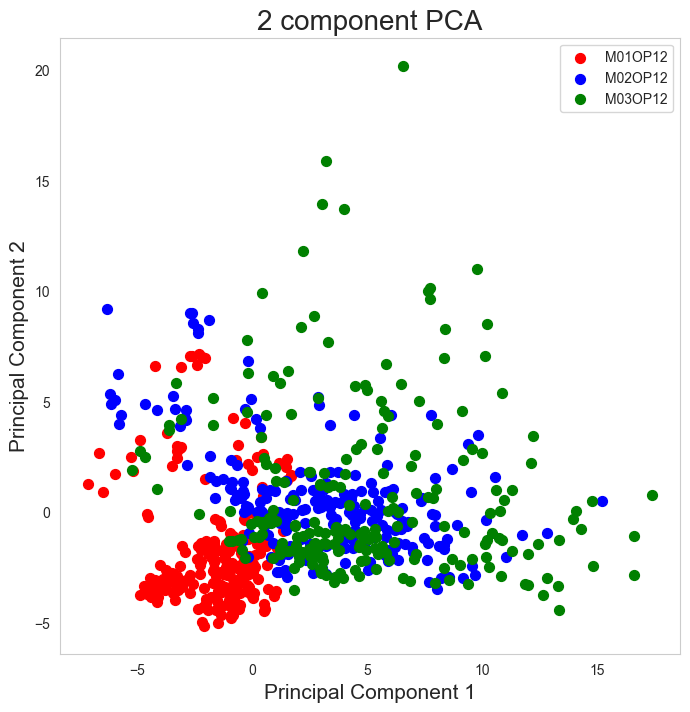

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M01OP12', 'M02OP12', 'M03OP12']
colors = ['r', 'b', 'g']
m = ['o','o','o']
for target, color,marker in zip(targets,colors,m):
    indicesToKeep = y == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50,
              marker = marker)
ax.legend(targets)
ax.grid()
plt.show()

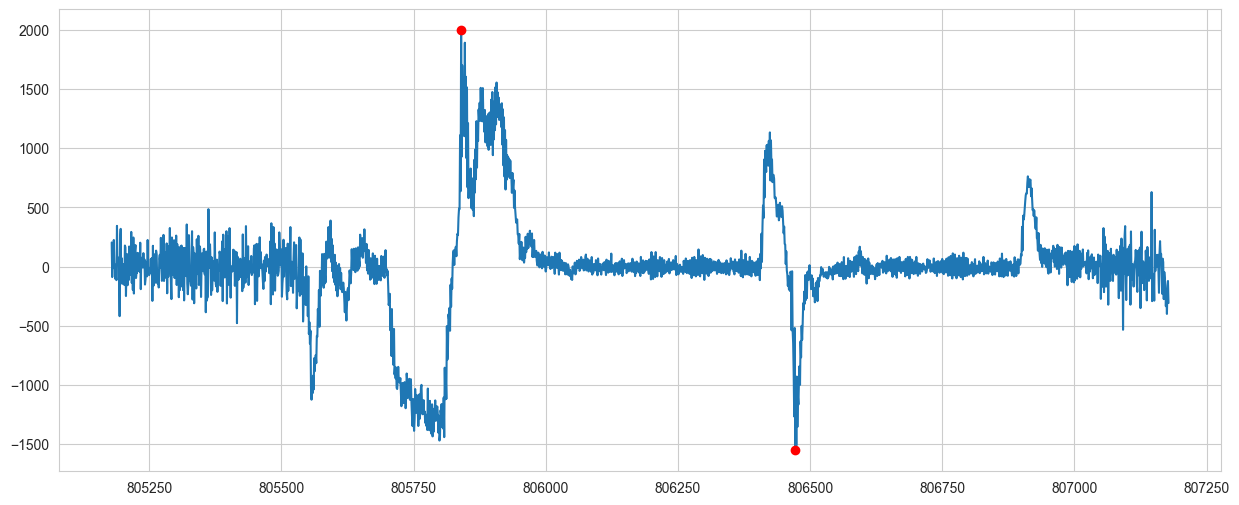

In [ ]:
plt.figure(figsize = (15, 6))
jj = 3000
plt.plot(masterdata['X'][jj:window_size+jj])
plt.plot(masterdata['X'][jj:window_size+jj].idxmax(),masterdata['X'][jj:window_size+jj].max(),'ro')
plt.plot(masterdata['X'][jj:window_size+jj].idxmin(),masterdata['X'][jj:window_size+jj].min(),'ro')

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X = time_feature_all.drop(['Machine','Date','Toolcondition'], axis=1)
Y = time_feature_all['Toolcondition']


X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, stratify = Y,
                                                                    random_state = 123)
print (y_test.value_counts(), y_train.value_counts())

# print('Training Features Shape:', X_train.shape)
# print('Training Labels Shape:', y_train.shape)
# print('Testing Features Shape:', X_test.shape)
# print('Testing Labels Shape:', y_test.shape)



OP04bad     157
OP04good    144
OP10bad     117
OP10good    107
OP07bad      71
OP07good     58
OP01bad      58
OP02bad      57
OP02good     48
OP01good     45
Name: Toolcondition, dtype: int64 OP04bad     628
OP04good    576
OP10bad     468
OP10good    426
OP07bad     285
OP01bad     232
OP07good    230
OP02bad     228
OP02good    192
OP01good    180
Name: Toolcondition, dtype: int64


In [ ]:
# !pip install tsfresh
# import tsfresh
# from tsfresh import select_features
# filtered_features = select_features(X , Y)
# filtered_features

In [ ]:
# #checking the sample in the train data
# datasample_train = pd.DataFrame()
# datasample_train = datasample_train.append(X_train)
# datasample_train['Toolcondition'] = y_train.values
# datasample_train = datasample_train.reset_index(drop = True)

# #checking the sample in the test data
# datasample_test = pd.DataFrame()
# datasample_test = datasample_test.append(X_test)
# datasample_test['Toolcondition'] = y_test.values
# datasample_test = datasample_test.reset_index(drop = True)

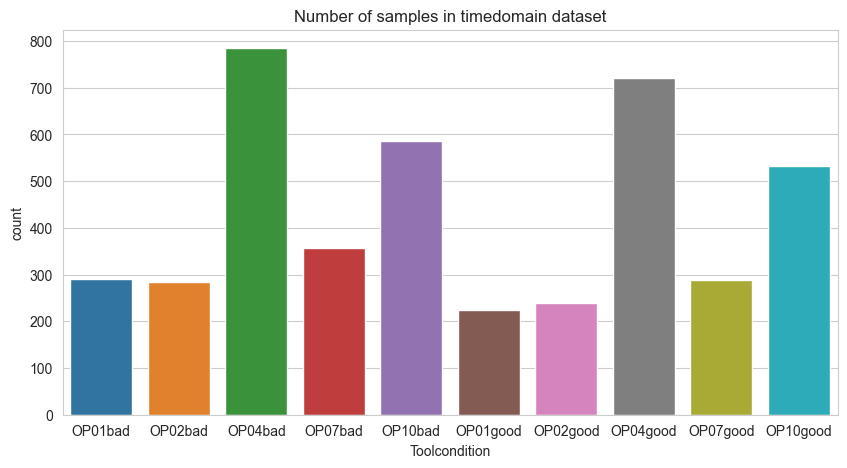

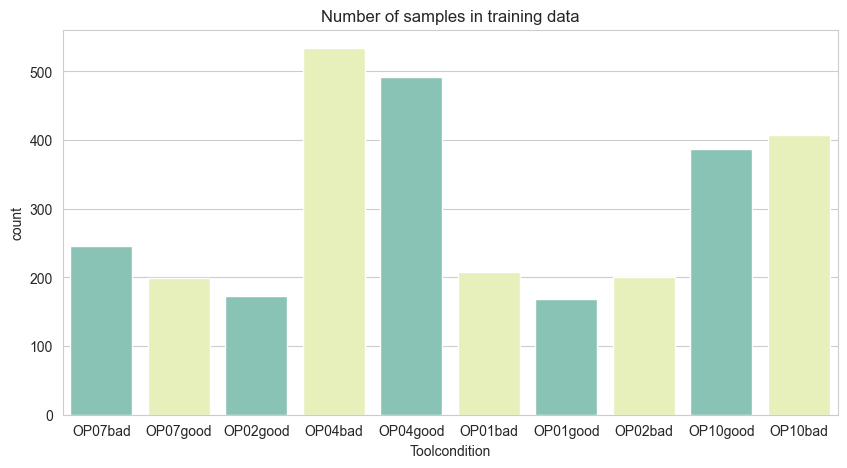

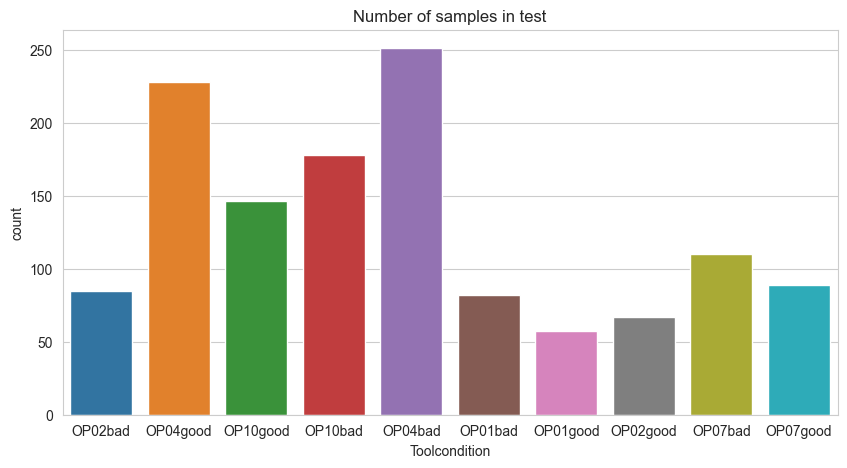

In [ ]:
# import seaborn as sns
# #checking the number of sample in time domain data
# sns.set_style('whitegrid')
# plt.figure(figsize = (10, 5))
# sns.countplot(x = 'Toolcondition', data = time_feature_all)
# plt.title('Number of samples in timedomain dataset')
# plt.show()

# sns.set_style('whitegrid')
# plt.figure(figsize = (10, 5))
# sns.countplot(x = 'Toolcondition', data = datasample_train,palette= ["#7fcdbb",                 "#edf8b1"])
# plt.title('Number of samples in training data')
# plt.show()

# sns.set_style('whitegrid')
# plt.figure(figsize = (10, 5))
# sns.countplot(x = 'Toolcondition', data = datasample_test)
# plt.title('Number of samples in test')
# plt.show()



# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

MODEL = make_pipeline(StandardScaler(), RandomForestClassifier(bootstrap = True, max_depth= 30,min_samples_leaf=1, min_samples_split= 5, n_estimators= 200, random_state = 42, verbose=1))
MODEL.fit(X_train, y_train)
y_pred = MODEL.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.8039443155452436

 -------------Classification Report-------------

              precision    recall  f1-score   support

     OP01bad       0.89      0.86      0.88        58
    OP01good       0.73      0.49      0.59        45
     OP02bad       1.00      0.95      0.97        57
    OP02good       0.81      0.60      0.69        48
     OP04bad       0.87      0.95      0.91       157
    OP04good       0.67      0.82      0.74       144
     OP07bad       0.77      0.72      0.74        71
    OP07good       0.67      0.53      0.60        58
     OP10bad       0.91      0.94      0.92       117
    OP10good       0.74      0.74      0.74       107

    accuracy                           0.80       862
   macro avg       0.81      0.76      0.78       862
weighted avg       0.80      0.80      0.80       862



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


# Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

MODEL = make_pipeline(StandardScaler(), LogisticRegression(random_state = 42))
MODEL.fit(X_train, y_train)
y_pred = MODEL.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))



Accuracy: 0.5290023201856149

 -------------Classification Report-------------

              precision    recall  f1-score   support

     OP01bad       0.57      0.53      0.55        58
    OP01good       0.29      0.13      0.18        45
     OP02bad       0.66      0.74      0.69        57
    OP02good       0.30      0.17      0.21        48
     OP04bad       0.64      0.62      0.63       157
    OP04good       0.47      0.67      0.56       144
     OP07bad       0.55      0.58      0.56        71
    OP07good       0.33      0.26      0.29        58
     OP10bad       0.67      0.79      0.73       117
    OP10good       0.31      0.23      0.27       107

    accuracy                           0.53       862
   macro avg       0.48      0.47      0.47       862
weighted avg       0.51      0.53      0.51       862



C:\Users\AHUSSAIN14\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


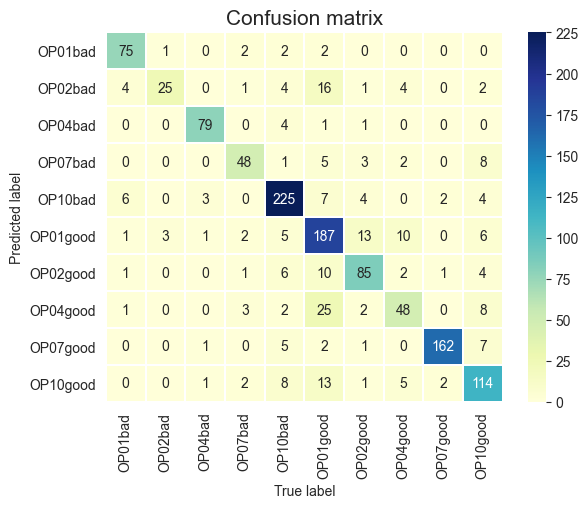

In [ ]:
from sklearn.metrics import confusion_matrix
# confusion matrix
labels = time_feature_all['Toolcondition'].unique()
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()

In [ ]:
labels = a
labels[0]

In [ ]:
# for i in ['OP07', 'OP08']:
#     for j in ['good', 'bad']:
#         data_36 = masterdata[(masterdata['Tool'] == i) & (masterdata['Condition'] == j)]
#         plt.figure(figsize = (15, 6))
#         sns.lineplot(x = data_36.index, y ='X', data = data_36)
#         sns.lineplot(x = data_36.index, y = 'Y', data = data_36)
#         sns.lineplot(x = data_36.index, y = 'Z',  data = data_36)
#         plt.legend(['x-axis', 'y-axis', 'z-axis'])
#         plt.ylabel(i+j)
#         plt.title(i, fontsize = 15)
#         plt.show()

In [ ]:
pip install PyWavelets matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pywt
for family in pywt.families():
    print(f'{family} family: {pywt.wavelist(family)}')

haar family: ['haar']
db family: ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']
sym family: ['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']
coif family: ['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17']
bior family: ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
rbio family: ['rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3